# Optimización con restriccións: extremos condicionados

Para resolver problemas de optimización (cálculo de máximos e mínimos absolutos) sobre unha rexión do espazo pechada e acoutada, debemos ter en conta as restriccións que supón traballar nestes dominios e non en todo o espazo (de dúas ou tres dimensións). Esto tipo de cálculos son os que se consideran na optimización con restriccións e neste caso, o cálculo dos extremos (máximos e mínimos) se califican como extremos condicionados (frente ás restriccións que teñen que verificar). Como xa puidemos estudar en nas sesións de pizarra, o cálculo dos extremos relativos baséase no uso de multiplicadores de Lagrange.

Nesta práctica volveremos a usar o módulo **Sympy** para calcular os extremos e para representar as funcións empregaremos os módulos **Matplotlib** e **Numpy**. 

### Obxectivos:

- Cálculo de extremos condicionados sobre unha curva do plano
- Cálculo de extremos condicionados sobre unha rexión pechada do plano
- Cálculo de extremos condicionados con varias restriccións


## Cálculo de extremos condicionados sobre unha curva do plano
Nesta práctica usaremos tanto o módulo **Sympy**, como tamén **Numpy** e **Matplotlib**. Así que debemos importalos para o resto do guión de prácticas:

In [12]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Como xa aconteceu en prácticas anteriores, debemos facer unha implementación propia para calcular o gradiente dunha función escalar $f$. Para iso usaremos a relación que xa coñecemos entre a matriz Xacobiana $Df$ dunha función escalar e o vector (columna) gradiente $\nabla f$, isto é $\nabla f=Df^{t}$:

In [13]:
gradient = lambda f, v: sp.transpose(sp.Matrix([f]).jacobian(v))

Para ilustrar o uso dos multiplicadores de Lagrange, imos a calcular os valores máximo e mínimo absolutos da función $f(x,y,z)=x+y$ sobre os puntos da elipse $(x-1)^2/64+(y-2)^2/36=1$:

In [14]:
x, y, l = sp.symbols('x y l', real=True) # define as variables simbólicas x, y, l
f = sp.Lambda((x,y), x+y) # función a optimizar
g = sp.Lambda((x,y), (x-1)**2/64 + y**2/36) # restricción

# Cálculo de puntos críticos
grad_f = gradient(f(x,y),(x,y))
grad_g = gradient(g(x,y),(x,y))
sol = sp.solve((sp.Eq(grad_f[0],l*grad_g[0]),sp.Eq(grad_f[1],l*grad_g[1]),sp.Eq(g(x,y),1)), (x,y,l))
for p in sol:
    print('Critical point (x,y,lambda)=',p,'; f(x,y)=', sp.N(f(*p[0:2])))

Critical point (x,y,lambda)= (-27/5, -18/5, -5) ; f(x,y)= -9.00000000000000
Critical point (x,y,lambda)= (37/5, 18/5, 5) ; f(x,y)= 11.0000000000000


Para comprobar visualmente o tipo de puntos críticos que posúe esta función, a podemos representar gráficamente:

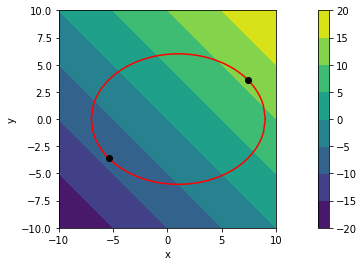

In [15]:
# Nube de puntos para o cálculo das curvas de nivel
N = 100  
xvec = np.linspace(-10, 10, N)
yvec = np.linspace(-10, 10, N)
X, Y = np.meshgrid(xvec, yvec)
F = sp.lambdify((x,y),f(x,y),"numpy")

# Representación gráfica da función f
plt.contourf(X, Y, F(X,Y))
plt.colorbar()  
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')

# Representación gráfica da restricción
xvec = np.linspace(-7, 9, N)
sol_curve = sp.solve(sp.Eq(g(x,y),1),y) # despexar y en función de x en g(x,y)=1
for c in sol_curve:
    curve = sp.lambdify(x,c,"numpy")
    plt.plot(xvec, curve(xvec),'r')

# Representación gráfica dos extremos relativos
for p in sol:
    plt.plot(p[0],p[1],'ko')

plt.show()

### **Exercicio 9.1** 
Calcula a distancia mínima do punto $(0,4)$ á parábola $x^2-4y=0$. Xustifica porque é posible asegurar que o mínimo é absoluto.

In [16]:
# O TEU CÓDIGO AQUÍ

## Cálculo de extremos condicionados sobre unha rexión do plano

Para ilustrar o uso dos multiplicadores de Lagrange, imos a calcular os valores máximo e mínimo absolutos da función $f(x,y,z)=x^2+y^2$ dentro da elipse $(x-1)^2/64+(y-2)^2/36\le 1$. Para facer isto, debemos proceder en dúas fases:

Primeiro, calculamos os candidatos a extremos relativos sobre a fronteira da rexión $(x-1)^2/64+(y-2)^2/36 = 1$:

In [17]:
x, y, l = sp.symbols('x y l', real=True) # define as variables simbólicas x, y, l
f = sp.Lambda((x,y), x**2 + y**2) # función a optimizar
g = sp.Lambda((x,y), (x-1)**2/64 + y**2/36) # restricción

# Cálculo de puntos críticos
grad_f = gradient(f(x,y),(x,y))
grad_g = gradient(g(x,y),(x,y))
sol = sp.solve((sp.Eq(grad_f[0],l*grad_g[0]),sp.Eq(grad_f[1],l*grad_g[1]),sp.Eq(g(x,y),1)), (x,y,l))
for p in sol:
    print('Critical point (x,y,lambda)=',p,'; f(x,y)=', sp.N(f(*p[0:2])))

Critical point (x,y,lambda)= (-7, 0, 56) ; f(x,y)= 49.0000000000000
Critical point (x,y,lambda)= (-9/7, -18*sqrt(5)/7, 36) ; f(x,y)= 34.7142857142857
Critical point (x,y,lambda)= (-9/7, 18*sqrt(5)/7, 36) ; f(x,y)= 34.7142857142857
Critical point (x,y,lambda)= (9, 0, 72) ; f(x,y)= 81.0000000000000


En segundo lugar, para completar o estudo dos extremos relativos, tamén debemos comprobar cales son os puntos críticos da función no interior da rexión elíptica $(x-1)^2/64+(y-2)^2/36 < 1$:

In [18]:
# Cálculo de puntos críticos
sol_int = sp.solve((sp.Eq(grad_f[0],0),sp.Eq(grad_f[1],0)), (x,y))
for p in sol_int:
    print('Critical point (x,y)=(',sol_int[x],sol_int[y],'); f(x,y)=', sp.N(f(sol_int[x],sol_int[y])))

Critical point (x,y)=( 0 0 ); f(x,y)= 0
Critical point (x,y)=( 0 0 ); f(x,y)= 0


Para comprobar visualmente o tipo de puntos críticos que posúe esta función, a podemos representar gráficamente:

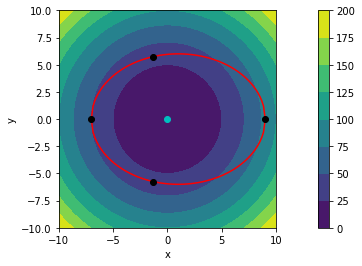

In [19]:
# Nube de puntos para o cálculo das curvas de nivel
N = 100  
xvec = np.linspace(-10, 10, N)
yvec = np.linspace(-10, 10, N)
X, Y = np.meshgrid(xvec, yvec)
F = sp.lambdify((x,y),f(x,y),"numpy")

# Representación gráfica da función f
plt.contourf(X, Y, F(X,Y))
plt.colorbar()  
plt.xlabel('x')
plt.ylabel('y')
plt.axis('square')

# Representación gráfica da restricción
xvec = np.linspace(-7, 9, N)
sol_curve = sp.solve(sp.Eq(g(x,y),1),y) # despexar y en función de x en g(x,y)=1
for c in sol_curve:
    curve = sp.lambdify(x,c,"numpy")
    plt.plot(xvec, curve(xvec),'r')

# Representación gráfica dos extremos relativos na fronteira
for p in sol:
    plt.plot(p[0],p[1],'ko')
    
# Representación gráfica dos extremos relativos no interior
plt.plot(sol_int[x],sol_int[y],'co')

plt.show()

### **Exercicio 9.2** 
Calcula os extremos absolutos da función $f(x,y)=2x^2-3y^2-2x$ no círculo centrado en $(0,0)$ e de radio $\sqrt{5}$ (tendo en conta tanto o interior como a súa fronteira).

In [20]:
# O TEU CÓDIGO AQUÍ

## Cálculo de extremos condicionados con varias restriccións
O cálculo de extremos condicionados con varias restriccións posúe a única complexidade de manexar varios multiplicadores de Lagrange ao mesmo tempo, cada un deles asociado a cada unha das diferentes restriccións do problema. Vexamos un exemplo que involucra dúas restriccións: Calcular o máximo e mínimo absoluto da función $f(x,y,z)=20+2x+2y+z^2$ na intersección da esfera $x^2+y^2+z^2=11$ e o plano $x+y+z=3$:

In [21]:
x, y, z, l1, l2 = sp.symbols('x y z l1 l2', real=True) # define as variables simbólicas x, y, l
f = sp.Lambda((x,y,z), 20 + 2*x +2*y + z**2) # función a optimizar
g1 = sp.Lambda((x,y,z), x**2+y**2+z**2) # restricción =11
g2 = sp.Lambda((x,y,z), x+y+z) # restricción =3

# Cálculo de puntos críticos
grad_f = gradient(f(x,y,z),(x,y,z))
grad_g1 = gradient(g1(x,y,z),(x,y,z))
grad_g2 = gradient(g2(x,y,z),(x,y,z))

sol = sp.solve((sp.Eq(grad_f[0],l1*grad_g1[0]+l2*grad_g2[0]),
                sp.Eq(grad_f[1],l1*grad_g1[1]+l2*grad_g2[1]),
                sp.Eq(grad_f[2],l1*grad_g1[2]+l2*grad_g2[2]), sp.Eq(g1(x,y,z),11), sp.Eq(g2(x,y,z),3)), (x,y,z,l1,l2))
for p in sol:
    print('Critical point (x,y,z,lambda1, lambda2)=',p,'; f(x,y)=', sp.N(f(*p[0:3])))

Critical point (x,y,z,lambda1, lambda2)= (-1, 3, 1, 0, 2) ; f(x,y)= 25.0000000000000
Critical point (x,y,z,lambda1, lambda2)= (3, -1, 1, 0, 2) ; f(x,y)= 25.0000000000000
Critical point (x,y,z,lambda1, lambda2)= (1 - 2*sqrt(3)/3, 1 - 2*sqrt(3)/3, 1 + 4*sqrt(3)/3, 2/3, 2/3 + 8*sqrt(3)/9) ; f(x,y)= 30.3333333333333
Critical point (x,y,z,lambda1, lambda2)= (1 + 2*sqrt(3)/3, 1 + 2*sqrt(3)/3, 1 - 4*sqrt(3)/3, 2/3, 2/3 - 8*sqrt(3)/9) ; f(x,y)= 30.3333333333333


### **Exercicio 9.3** 
Calcular o máximo e mínimo absoluto da función $f(x,y,z)=20+2x+2y+z^2$ na intersección do cilindro de radio $1$ e eixe $OZ$ e o plano $x-z=1$:

In [22]:
# O TEU CÓDIGO AQUÍ